# SalesTable class

Now that we have cleaned Transactions and Products tables, can we use a Python class object to make transformations, analysis, and aggregate customer profiling/market segmentation possible in a more streamlined and organized way?

This process should be abstractable in some form, if only conceptually, to other workflows.


By providing transformers and wrappers for a data science workflow, I hope to be able to empower my team or organization to better serve the needs of customers. I feel I can greatly benefit my teammates through data workflow comprehension and business-facing outcomes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


import dtcj

import seaborn as sns

import pprint

In [2]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, TransformerMixin

transformers = []
names = []


### HIGH-LEVEL DASHBOARDS AND WRAPPERS

In [57]:
class SalesTable:
    
    def __init__(self, 
             df,
             sales_col='SALES_VALUE',
             customer_id='household_key',
             dt_col='datetime',
            ):
        '''Accept a pandas DataFrame as `df`; must also pass all default parameters.

        This will just be a table of sales. We can assume three columns:
            `sales value`; a sales column, for orders or items
            `customer id`; customer identifier
            `date time`; a date and time of purchase
            
        We're gonna try to make this transactions table tell us something about our customers.
        
        Any number of simple calculations could be stored about this table as statistics; as well as visualizations,
        transformations, returned feature/target spaces, class label process etc.


        '''
        # identifying sales, ID, datetime column names
        self.sales_col = sales_col
        self.customer_id =  customer_id
        self.dt_col = dt_col
        
        # loading passed dataframe
        self.df = df
        # identify customer id set
        self.customer_ids = list(self.df[self.customer_id].unique()) # wrap these two in a load_df wrapper/setter


    # sales over time plots
    def sales_over_time(self, 
                    sales_cols=['SALES_VALUE',],
                    resample_rule = 'BQ', # only works for datetime.
                    hh_keys=None
                       ):
        """return the sales series for one or many given `customer_id`s
 


        By segmenting this way, I can produce timeseries by sample size and resample group
        such as to form a tensor/matrix of sales over time for various categories

        The similarity across matrices will then represent purchase behaviour. 

        We could additionally provide RFM attributes or other variables over time to add depth to our matrix of timeseries points;
            -> null errors with churn, customer acquisition

        This would provide an accurate representation of **purchase behaviour over time**, such as noticeable by our data...

        We don't need to use deep learning to compare these behaviours against direct marketing campaigns
                -> we are not investigating whether customers knew about the sales -->
                    -> we have a small sample group of targeted households, is their behaviour noticeably affected
                        -> versus a control group of similar-purchasing-households? similar demographics?


        """

        # allow list-based filtering...
        if hh_keys==None:
            hh_keys = self.customer_ids


        ## record fails and outputs
        idx = []
#         fails = []
        output = pd.DataFrame()
        for hh in hh_keys:
            try:
                for col in sales_cols:
#                 print(col)
#                     idx.append(f'{resample_rule}-{col}-{hh}')?
#                     or should the datetime axis be renamed?

                    idx.append(hh)
                
                    output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[col].sum(), ignore_index=True)
            except:
#                 fails.append(f'{col}-{hh}')
#                 fails.append(hh)
                pass
#             else:
#                 idx.append(f'{self.sales_col}-{hh}')
#                 try:
#                     output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[sales_cols[0]].sum(), ignore_index=True)
#                 except:
#                     fails.append(f'{self.sales_col}-{hh}')
#                     pass
                
                
    #     assert all(hh_keys == list(output.index)) ## what a terrible assertion dude..don't pass thru constructor

        output.index = idx
        output.index.name='household_key'
#         output.fillna(0, inplace=True) ### these nulls indicate non-existent household??
                                        ### there are other 0's in the data, between full columns.

        return output
    
#     def __repr__(self):
#         return pprint.pprint(f"Transactions Table Object\nSales Column : {self.sales_col}\nCustomer ID Column : {self.customer_id}\nDateTime Column : {self.dt_col}\nShape of DF : {self.df.shape}\nNumber of Customers : {len(self.customer_ids)}\
#             ")


# Testing LoadMerged Interface

In [49]:
Merged = SalesTable(dtcj.load_merged())

In [50]:
merged = Merged.df

In [51]:
len(Merged.customer_ids)

2485

In [58]:
Demo_trans = SalesTable(merged[merged['household_key'].isin(dtcj.demo_list())])

In [59]:
len(Demo.customer_ids)

801

In [60]:
merged.shape, demo.shape

((2380828, 19), (1320234, 19))

In [61]:
demo_trans = Demo.df
demo_trans.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,datetime,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Section Labels
1,243,28197355878,102,909714,1,0.72,323,0.0,1011,15,0.0,0.0,2004-07-02 10:11:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
2,707,28210545743,103,909714,1,2.35,429,0.0,1119,15,0.0,0.0,2004-07-03 11:19:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
3,329,28210628714,103,909714,1,2.10,450,0.0,2037,15,0.0,0.0,2004-07-03 20:37:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
5,1975,28210853840,103,909714,1,2.26,369,0.0,1515,15,0.0,0.0,2004-07-03 15:15:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
6,1797,28235710352,101,909714,1,1.42,322,0.0,1049,15,0.0,0.0,2004-07-01 10:49:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce


In [112]:
Demo_trans.sales_over_time(resample_rule='BQ', hh_keys=[1])

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
household_key,,,,,,,
1,687.31,556.74,557.52,684.72,554.43,616.9,462.45


Using the sales_over_time function defined in the superclass above, we can plot the sales-over-time feature space using the datetime index to resample time groups.

Note that the data may be returned with null values. These nulls appear to actually be indicators of churn, but more investigation is necessary. I've left in this 'feature' as it requires a single line of code to fix, on the back end side of things, and it may provide access to information later.

Since we can plot any column in our transactions table in this way, if we added in a sales-by-category column (for specific items of interest), we could resample onto that column instead;


In [113]:
Demo_trans.sales_over_time(sales_cols=['RETAIL_DISC'])

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
household_key,,,,,,,
243,-79.58,-109.85,-116.44,-123.59,-136.99,-90.21,-73.26
707,-294.10,-286.89,-284.29,-277.98,-257.77,-299.75,-266.84
329,-21.36,-32.30,-32.36,-30.22,-42.79,-55.02,-35.59
1975,-136.99,-155.31,-234.82,-310.16,-204.48,-312.53,-147.85
1797,-166.62,-179.71,-181.63,-141.21,-105.72,-170.04,-140.96
...,...,...,...,...,...,...,...
1443,-50.51,-39.75,-17.73,-18.81,-0.59,-10.24,-7.75
2279,-28.32,0.00,-38.43,-23.26,-35.09,-61.58,-20.05
48,-11.67,-0.35,0.00,-54.37,-93.25,-9.59,-22.24


One of the limitations of this method thus far is the lack of clarity for which column this data has been taken from. 

We want to maintain the household index integrity as well as the datetime column. We could simply add a column with the section label for each row, or perhaps a second-tier index indicating the section...

# Using SalesTable object function `sales_over_time` to create feature spaces over multiple timeframes (weekly, monthly, quarterly)

## Business Quarterly

In [106]:
demo_quarterly_sum_sales = Demo_trans.sales_over_time(resample_rule='BQ')
demo_quarterly_sum_sales.fillna(0, inplace=True)

In [108]:
demo_quarterly_sum_sales

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
household_key,,,,,,,
243,794.03,801.61,827.58,1015.81,934.94,1022.76,789.95
707,2084.58,2282.46,2534.15,2300.52,2192.68,2217.74,1663.76
329,332.11,317.25,422.91,310.93,466.28,659.83,453.39
1975,2040.04,2175.30,2628.12,2995.74,1767.00,2669.01,1000.73
1797,484.48,872.46,667.03,504.49,628.49,1093.80,831.62
...,...,...,...,...,...,...,...
1443,514.73,555.02,285.67,188.01,45.62,291.76,190.08
2279,126.23,4.38,107.09,98.55,141.38,312.16,125.34
48,158.50,18.50,13.12,225.28,374.08,119.33,100.64


## Business Monthly

In [118]:
demo_monthly_sum_sales = Demo_trans.sales_over_time(resample_rule='BM')
demo_monthly_sum_sales.fillna(0, inplace=True)

In [119]:
demo_monthly_sum_sales

,2004-07-30,2004-08-31,2004-09-30,2004-10-29,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-29,2005-05-31,2005-06-30,2005-07-29,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-30,2006-01-31,2006-02-28
household_key,,,,,,,,,,,,,,,,,,,,
243,319.90,218.56,255.57,242.26,226.74,332.61,370.43,164.01,293.14,308.97,336.15,370.69,397.95,296.31,240.68,208.41,473.37,340.98,510.44,279.51
707,570.58,817.86,696.14,826.87,409.50,1046.09,735.47,892.14,906.54,517.14,1015.47,767.91,668.96,953.34,570.38,747.30,492.16,978.28,826.51,837.25
329,95.33,131.43,105.35,101.68,93.69,121.88,170.52,154.43,97.96,93.32,93.36,124.25,67.15,216.03,183.10,258.75,220.67,180.41,270.61,182.78
1975,784.88,268.50,986.66,392.05,777.20,1006.05,680.23,899.28,1048.61,1060.29,1245.76,689.69,520.64,646.89,599.47,837.14,742.00,1089.87,468.35,532.38
1797,118.99,149.37,216.12,215.66,232.19,424.61,127.84,200.61,338.58,126.91,182.73,194.85,248.33,65.89,314.27,217.69,572.18,303.93,530.58,301.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,189.46,203.51,121.76,168.85,273.43,112.74,107.33,88.32,90.02,62.67,73.66,51.68,0.00,14.57,31.05,107.89,121.27,62.60,57.77,132.31
2279,42.61,62.38,21.24,4.38,0.00,0.00,0.00,34.01,73.08,20.48,12.35,65.72,61.31,26.68,53.39,98.48,102.65,111.03,57.22,68.12
48,33.27,109.98,15.25,5.56,12.94,0.00,0.00,13.12,0.00,0.00,100.33,124.95,202.65,132.48,38.95,40.06,0.00,79.27,71.04,29.60


# Weekly

We could consider using a moving average (.rolling()), or a differential from the previous value/house-wise-numeric-mean in order to smooth our relationships.

In [117]:
demo_weekly_sum_sales = Demo_trans.sales_over_time(resample_rule='W').iloc[:, 1:-1] # drop the first and last weeks...?
demo_weekly_sum_sales.fillna(0, inplace=True)

In [120]:
demo_weekly_sum_sales

,2004-07-11,2004-07-18,2004-07-25,2004-08-01,2004-08-08,2004-08-15,2004-08-22,2004-08-29,2004-09-05,2004-09-12,...,2005-12-25,2006-01-01,2006-01-08,2006-01-15,2006-01-22,2006-01-29,2006-02-05,2006-02-12,2006-02-19,2006-02-26
household_key,,,,,,,,,,,,,,,,,,,,,
243,143.16,111.68,9.88,0.00,32.41,120.98,49.90,15.27,76.83,53.16,...,69.07,30.63,194.84,82.34,81.84,151.42,77.23,52.36,95.13,54.79
707,185.46,123.91,129.74,98.05,120.03,139.84,260.27,165.60,195.94,69.36,...,432.58,225.60,188.04,187.78,138.80,241.95,206.54,241.79,147.72,228.72
329,22.17,26.39,0.00,16.31,35.01,7.36,67.88,21.18,11.89,37.64,...,0.00,48.92,96.73,86.30,51.26,36.32,20.41,44.37,51.35,66.65
1975,123.58,180.42,218.45,146.33,32.36,0.00,129.13,90.34,110.95,236.28,...,222.53,415.23,97.22,119.16,79.15,134.30,141.37,151.73,134.61,80.87
1797,36.21,0.00,0.00,35.33,33.90,0.00,0.00,115.47,39.58,0.00,...,41.93,86.55,103.44,117.89,74.32,142.98,131.41,67.54,111.78,82.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,53.15,49.71,11.18,71.94,44.01,31.68,71.70,20.68,36.64,30.12,...,0.00,12.08,0.00,7.63,33.27,16.87,6.35,55.31,0.00,47.75
2279,2.00,35.32,0.00,5.29,0.00,0.00,0.00,62.38,8.37,0.00,...,9.76,52.51,4.19,9.60,4.59,0.00,1.99,5.18,16.55,46.39
48,0.00,33.27,0.00,65.63,0.00,0.00,44.35,0.00,0.00,9.65,...,45.41,0.00,71.04,0.00,0.00,0.00,0.00,29.60,0.00,0.00


# Comparing time-series similarity...

If we were to simply categorize each feature as an ordinal value along the time axis; using this in place of customizing weights (which I don't really know how to do) to reflect that the largest values in the series might be most important;

We can simply apply a transformation using an sklearn TransformerMixin and make_pipeline

## TransformerMixin

In [111]:
class prepare_timeseries(TransformerMixin):
    def __init__(self, X, y=None):
        self.X = X
        
    
    def transform(self):
        X = self.X
        
        # log transform
        X = np.log(X+1)

        
        
        #apply weight scaling across time axis
#         def fib(n):
#             return pow(2<<n,n+1,(4<<2*n)-(2<<n)-1)%(2<<n)
        
        
#         gen = [fib(x) for x in range(1, len(X.columns)+1)]
        
#         for combo, col in zip(gen, X.columns):
#             X[col] = (X[col] * combo)

        return X
        
        # 
        
my_transformer = prepare_timeseries(demo_quarterly_sum_sales)

my_transformer.transform()

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
household_key,,,,,,,
243,6.678380,6.687869,6.719713,6.924426,6.841551,6.931237,6.673235
707,7.642802,7.733447,7.838008,7.741325,7.693336,7.704695,7.417436
329,5.808473,5.762837,6.049521,5.742779,6.146929,6.493497,6.118956
1975,7.621215,7.685381,7.874404,8.005280,7.477604,7.889837,6.909484
1797,6.185138,6.772462,6.504333,6.225528,6.444910,6.998327,6.724577
...,...,...,...,...,...,...,...
1443,6.245583,6.320804,5.658332,5.241800,3.842030,5.679353,5.252692
2279,4.845996,1.682688,4.682964,4.600660,4.958500,5.746714,4.838977
48,5.072044,2.970414,2.647592,5.421773,5.927139,4.790238,4.621437


Ok, the baseline log transform also seems good... I've redacted my fibonacci-weighting-over-time.

I'd like to cluster these timeseries by similarity of some sort. Some thoughts are:
    
- fit a regression model to each household
    - scaled and adjusted to intercept 0?
        - normalized euclidean distance from the (row-wise) mean
        - normalized euclidean distance from the (column-wise) mean'
        
- quantile binning
    - along household axis
    - along column axis
    
- some other form of decomposition, like PCA

- correlation matrix/cosine similarity/mutual information similarity of one more or more of the above
    
In some basic research, a zero-truncated poisson distribution might be appropriate for our sales totals (and maybe the previously-calculated Frequency measure as well).

I want to know some things about these time series vectors; the row-wise similarity as total spend, but also their similarity across multiple categories, like department spend. This entails a whole set of matrices.


In [19]:
# (quarterly_sum_sales.T + 0.001).pct_change().diff().iloc[2:,:].plot()

# Adding Section Sales

In [44]:
def add_section_sales(df, 
                      cat_col='Section Labels',
                      sales_col = 'SALES_VALUE',
                      id_col = 'household_key',
                         ) -> pd.DataFrame():
        
        
        ### accept a SalesTable object and return the sales broken down by a category, such as Section Labels
                                 ### could also be another product segmentation column
        
        idx = df.index
        # get dummies for each transaction row
        section_dummies = pd.get_dummies(df[cat_col])
#         print(all(section_dummies.index == idx))

        # multiply each row by it's SALES VALUE
        section_sales = section_dummies.apply(lambda x: x * df[sales_col])
        
#         print(all(section_sales.index == idx))
        
        
        return section_sales


In [66]:
len(Demo_trans.df) == len(add_section_sales(Demo_trans.df))

True

In [67]:
Demo_trans.df = Demo_trans.df.join(add_section_sales(Demo_trans.df)) # modifying the underlying dataframe

Demo_trans.sales_over_time(sales_cols=['alcohol']) # returning alcohol sales

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
household_key,,,,,,,
243,6.39,7.99,0.00,0.00,0.00,0.00,0.00
707,76.93,195.83,273.27,212.71,203.37,243.39,84.96
329,0.00,0.00,4.99,0.00,0.00,0.00,0.00
1975,234.85,656.58,386.26,297.10,225.35,31.98,0.00
1797,7.99,65.94,17.36,0.00,15.24,30.97,5.49
...,...,...,...,...,...,...,...
1443,94.90,201.26,85.90,35.96,35.46,164.80,116.09
2279,4.59,0.00,0.00,0.00,0.00,50.97,0.00
48,0.00,0.00,0.00,0.00,0.00,0.00,0.00


adding a target space to feature spaces from Demo_trans;

## Section Sales Over Time

Bringing in our household profiles (`hh_agg`), we can have access to RFM labels and aggregate information...

In [68]:
hh_agg = dtcj.load_hh_agg(Demo_trans.df)

### proof of concept for one column

lets take sum of sales over time from our SalesTable object, using the recently added Section column 'alcohol'.

In [101]:
bq_demo_alcohol_sales = hh_agg.drop(['first_purchase', 'last_purchase', 'avg_item_cost', ], axis=1).merge(Demo_trans.sales_over_time(sales_cols=['alcohol']), on='household_key')

bq_demo_alcohol_sales

# The last columns are the alcohol related sales by business quarter -- they've not been renamed. 
# The values were returned as a merge onto the customer profile

,total_spend,total_loyalty,total_coupon,total_quantity,num_baskets,unique_products,avg_basket_spend,alcohol_log_transformed_sales_total,beverages_log_transformed_sales_total,concessions_log_transformed_sales_total,...,M,RFM,RFM Bins,2004-09-30 00:00:00,2004-12-31 00:00:00,2005-03-31 00:00:00,2005-06-30 00:00:00,2005-09-30 00:00:00,2005-12-30 00:00:00,2006-03-31 00:00:00
household_key,,,,,,,,,,,,,,,,,,,,,
1,4120.07,-642.14,-25.65,1901,81,655,50.865062,1.868721,5.752033,3.012098,...,3,10,3,6.48,0.00,0.00,0.00,0.00,0.00,0.00
7,3170.21,-433.54,-5.15,1454,53,777,59.815283,1.607436,5.299766,4.381026,...,2,8,2,0.00,0.00,4.99,0.00,0.00,0.00,0.00
8,5075.29,-995.67,-1.85,2293,106,1219,47.880094,5.400016,5.296065,5.156350,...,4,11,3,32.97,37.45,22.97,47.44,28.55,52.03,0.00
13,8701.99,-1406.00,-77.25,3212,174,998,50.011437,5.403578,6.171888,5.567313,...,5,14,4,31.27,88.12,11.99,22.78,39.37,28.67,0.00
16,1224.70,-157.14,0.00,531,86,256,14.240698,2.483239,3.399195,0.000000,...,1,7,2,6.99,4.99,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2007.99,-416.05,-0.90,800,30,476,66.933000,4.173156,4.391234,3.128075,...,1,7,2,6.99,0.00,0.00,49.44,8.49,0.00,0.00
2496,4015.65,-1103.17,-12.40,1893,48,753,83.659375,5.112168,4.446057,3.103689,...,3,8,2,42.03,49.05,0.00,17.71,34.76,0.00,22.48
2497,6792.55,-1299.67,-0.75,2928,202,968,33.626485,5.917333,4.812672,4.379649,...,4,13,4,102.88,97.58,8.49,61.94,54.60,45.93,0.00


### Creating SalesTable.sales_over_time matrices for all categories in 'Section Labels'

In [91]:
bq_demo_all = dict()

for section in Demo_trans.df['Section Labels'].unique():
    bq_demo_all[section] = hh_agg.drop(['first_purchase', 'last_purchase', 'avg_item_cost', ], axis=1).merge(Demo_trans.sales_over_time(sales_cols=[section]), on='household_key')

In [121]:
bq_demo_all.keys()

dict_keys(['produce', 'beverages', 'grain_goods', 'junk_food', 'meat', 'concessions', 'misc', 'dairy', 'home_family', 'grocery', 'alcohol', 'drug', 'seasonal', 'kitchen', 'garden'])

In [123]:
all(bq_demo_all['alcohol'] == bq_demo_alcohol_sales)


True

### Summary and next Steps

Now that we have a matrix of column sales for each of our sections over the business quarterly timeframe:

- We want to see which households are similar along certain axes. This could entail splitting the feature space in some way;
 
- We said we wanted log-total-sales and mean-period-sales, dropping null sections

- By using qcut, we could distribute the timeseries into bins:

    - representing the strength of each household's interaction with the Section over time, normalized over their own impact; 
    - representing the strength of each household's impact on the total Section sales (normalized over the whole)
    - or a combination of both.

- NOTE: We have not included the number of baskets, such as to calculate 'mean' spend -- but using the null values 'feature', we can distringuish between 0 for the category, and a churned customer.

In [124]:
[bq_demo_all[x].shape for x in bq_demo_all.keys()]

[(801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49)]

# Assigning Cluster Labels 

I want to add in RFM information with some strong weights before comparing the sales series scores; perhaps simply weighting the time series by factors of frequency or recency outright; to examine impact/causal analysis we might want to look at disturbances from a rolling-mean baseline of sales;

In [129]:
def run_kmeans_test(df, test_range=(2,16)):
    from sklearn.cluster import KMeans
    
    inertias = []
    
    for n_clusters in range(test_range[0], test_range[1]):
        km_model = KMeans(n_clusters=n_clusters)

        # results from fit_predict
        results = km_model.fit_predict((np.log(df + 1)))
        inertias.append(km_model.inertia_)
        
    return inertias

In [330]:
run_kmeans_test(prepare_timeseries(demo_quarterly_sum_sales).transform())

[246.5688417775001,
 184.9572777951781,
 150.99050998833866,
 125.5283374359356,
 111.70092369613592,
 97.1932791974801,
 88.34482206938524,
 79.93783449853196,
 73.17758917841455,
 69.74162835975481,
 63.04157508044035,
 59.15047089837142,
 54.67615892422645,
 52.40160730801354]

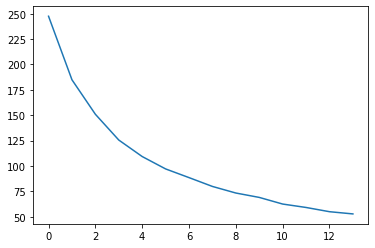

In [331]:
plt.plot(list(run_kmeans_test(prepare_timeseries(demo_quarterly_sum_sales).transform())))

In [332]:
len(kmeans_labels)

801

## PCA Decomposition

In [223]:

class pca_transform:
    
    def __init__(self, X, y=None):
        self.X = X 
    from sklearn.decomposition import PCA

    def transform(self):

        decomposer = PCA()
        decomposer.fit(self.X)
        
        return decomposer

In [224]:
my_pca = PCA(n_components=0.85).fit(demo_quarterly_sum_sales)

In [225]:
pca_transformed = my_pca.transform(demo_quarterly_sum_sales)
pca_transformed.shape

(801, 2)

## K Means

In [313]:
def run_kmeans_model(df, n_clusters=5):
    from sklearn.cluster import KMeans

    km_model = KMeans(n_clusters=n_clusters)

    km_model.fit(feature_matrix)

    return km_model.labels_

In [314]:
kmeans_results = run_kmeans_model(demo_quarterly_sum_sales) 

demo_quarterly_sum_sales.groupby(kmeans_results).sum()

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
0,158915.26,177229.88,168974.29,164738.75,158448.43,163109.15,108359.07
1,63764.96,69787.49,72289.09,66666.94,71826.16,75681.62,48455.11
2,79941.77,98885.44,103395.86,120025.46,127334.71,142118.91,88751.20
3,126145.17,139393.40,127955.60,125023.47,124584.43,123998.09,80456.05
4,85600.19,90453.61,95107.60,104027.15,120679.12,117430.53,72253.65


## AgglomerativeClustering

In [315]:
def run_agglomerative_model(df, n_clusters=5):
    from sklearn.cluster import AgglomerativeClustering
    
    #instantiate
    model = AgglomerativeClustering(n_clusters=n_clusters)


    # results from fit_predict
    results = model.fit_predict((np.log(df + 1)))
    
    return results

In [316]:
# assign labels to df
agg_cluster_results = run_agglomerative_model(demo_quarterly_sum_sales)

In [317]:
demo_quarterly_sum_sales.groupby(agg_cluster_results).sum()

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
0,19029.51,16335.08,11318.52,20039.35,17994.89,9706.14,3338.01
1,78457.11,96993.48,111384.96,111646.15,131718.64,143648.18,81531.09
2,157.54,1385.93,5357.93,8740.80,10080.76,10538.14,6623.72
3,224877.33,245355.11,231612.27,237680.13,227648.53,238550.92,162229.47
4,191845.86,215680.22,208048.76,202375.34,215430.03,219894.92,144552.79


# Mutual Information Score for labels

In [318]:
from sklearn.metrics import mutual_info_score

mutual_info_score(kmeans_results, agg_cluster_results) 
# PCA transformed mutual score

0.5800407607910365

In [319]:
log_weighted_kmeans_results = run_kmeans_model(prepare_timeseries(demo_quarterly_sum_sales).transform()) 
log_weighted_agg_cluster_results = run_agglomerative_model(prepare_timeseries(demo_quarterly_sum_sales).transform())

In [320]:
mutual_info_score(log_weighted_kmeans_results, log_weighted_agg_cluster_results) 
# log-transformed and weighted mutual score

0.3992081629368911

# Comparing Cluster Labels to RFM Score

In [321]:
hh_agg = dtcj.load_hh_agg(Demo.df)


demo_quarterly_sum_sales.index.name = 'household_key'

In [322]:
df = demo_quarterly_sum_sales.merge(hh_agg.reset_index()[['RFM Bins','R','F','M', 'RFM', 'household_key']], on='household_key').set_index('household_key')

In [323]:
df

,2004-09-30 00:00:00,2004-12-31 00:00:00,2005-03-31 00:00:00,2005-06-30 00:00:00,2005-09-30 00:00:00,2005-12-30 00:00:00,2006-03-31 00:00:00,RFM Bins,R,F,M,RFM
household_key,,,,,,,,,,,,
243,794.03,801.61,827.58,1015.81,934.94,1022.76,789.95,4,5,4,4,13
707,2084.58,2282.46,2534.15,2300.52,2192.68,2217.74,1663.76,5,5,5,5,15
329,332.11,317.25,422.91,310.93,466.28,659.83,453.39,3,5,4,2,11
1975,2040.04,2175.30,2628.12,2995.74,1767.00,2669.01,1000.73,5,5,5,5,15
1797,484.48,872.46,667.03,504.49,628.49,1093.80,831.62,3,5,2,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1443,514.73,555.02,285.67,188.01,45.62,291.76,190.08,3,5,4,1,10
2279,126.23,4.38,107.09,98.55,141.38,312.16,125.34,2,5,1,1,7
48,158.50,18.50,13.12,225.28,374.08,119.33,100.64,2,4,1,1,6


In [324]:
mutual_info_score(df['M'], kmeans_results)

0.9402068635745116

So, our kmeans results and our Monetary score bins are fairly similar, for the log-transformed and exponentially weighted series. 

In [326]:
mutual_info_score(df['RFM Bins'], log_weighted_kmeans_results)

0.44666839327990354

# Plotting Log Distributions

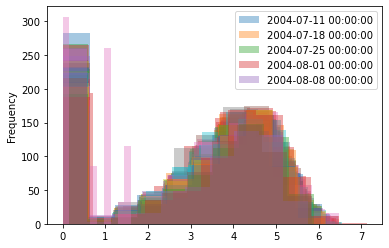

In [327]:
def plot_sales_matrix(sum_sales_matrix):
    [[np.log(matrix[col]+1).plot(kind='hist', alpha=0.4, label=f'{col}') for col in matrix] for matrix in [sum_sales_matrix]]
    plt.legend(labels=[col for col in sum_sales_matrix][:5])
    plt.show() # log rn

plot_sales_matrix(demo_weekly_sum_sales)

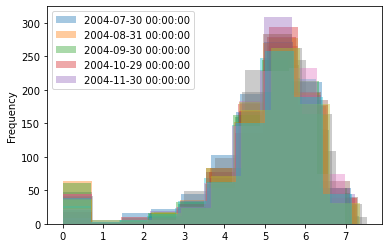

In [328]:
plot_sales_matrix(demo_monthly_sum_sales)

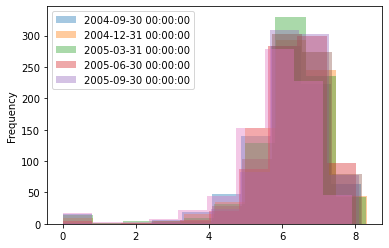

In [329]:
plot_sales_matrix(demo_quarterly_sum_sales)

The above is the histogram of log-transformed sales for all households in the self.df attribute; over weekly, monthly and quarterly periods. 

This may not be the best way to approach the weekly time period; we might consider a Zero-truncated Poisson distribution or binomial distribution to model these distributions?
    

Another thought would be to use rolling windows of these values, in order to smooth over any bad boundary anomalies.

Check twice about nulls in the resample calculation -- they could be churn or customer acquisition figures.


### Package Test

In [ ]:
Merged = dtcj.load.Merged()

In [ ]:
Merged

In [ ]:
merged = Merged.df
merged.shape

In [ ]:
demo_only = Merged.demo_only()

demo_only.shape

In [ ]:
bq_sales = sales_over_time(Merged)

In [ ]:
bq_sales

[np.log(bq_sales[col]+1).plot(kind='hist', alpha=0.4) for col in bq_sales]

bq_sales.isna().sum()

sns.heatmap(bq_sales.T.corr())

In [4]:
class LoadMerged(SalesTable):

    '''Wrapper for Table 1; Merged
    Loads clean data
    Adds additional Functions and Properties:
        feature/target sets;
            demographic households only;
        
        tensor of household purchase behaviour
    
    '''    
    def __init__(self,
                 df=None,
                 sales_col='SALES_VALUE',
                 customer_id='household_key',
                 dt_col='datetime',
                ):
 
        # identifying sales, ID, datetime columns
        
        if df == None:
            df = dtcj.load_merged()

        
        self.sales_col = sales_col
        self.customer_id =  customer_id
        self.dt_col = dt_col
        self.df = df
        self.customer_ids = sorted(list(self.df[self.customer_id].unique())) # wrap these two in a load_df wrapper/setter


# Adding Section Sales

In [44]:
def add_section_sales(df, 
                      cat_col='Section Labels',
                      sales_col = 'SALES_VALUE',
                      id_col = 'household_key',
                         ) -> pd.DataFrame():
        
        
        ### accept a SalesTable object and return the sales broken down by a category, such as Section Labels
                                 ### could also be another product segmentation column
        
        idx = df.index
        # get dummies for each transaction row
        section_dummies = pd.get_dummies(df[cat_col])
#         print(all(section_dummies.index == idx))

        # multiply each row by it's SALES VALUE
        section_sales = section_dummies.apply(lambda x: x * df[sales_col])
        
#         print(all(section_sales.index == idx))
        
        
        return section_sales


In [66]:
len(Demo_trans.df) == len(add_section_sales(Demo_trans.df))

True

In [67]:
Demo_trans.df = Demo_trans.df.join(add_section_sales(Demo_trans.df)) # modifying the underlying dataframe

Demo_trans.sales_over_time(sales_cols=['alcohol']) # returning alcohol sales

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
household_key,,,,,,,
243,6.39,7.99,0.00,0.00,0.00,0.00,0.00
707,76.93,195.83,273.27,212.71,203.37,243.39,84.96
329,0.00,0.00,4.99,0.00,0.00,0.00,0.00
1975,234.85,656.58,386.26,297.10,225.35,31.98,0.00
1797,7.99,65.94,17.36,0.00,15.24,30.97,5.49
...,...,...,...,...,...,...,...
1443,94.90,201.26,85.90,35.96,35.46,164.80,116.09
2279,4.59,0.00,0.00,0.00,0.00,50.97,0.00
48,0.00,0.00,0.00,0.00,0.00,0.00,0.00


adding a target space to feature spaces from Demo_trans;

In [68]:
hh_agg = dtcj.load_hh_agg(Demo_trans.df)

In [109]:
bq_demo_alcohol_sales = hh_agg.drop(['first_purchase', 'last_purchase', 'avg_item_cost', ], axis=1).merge(Demo_trans.sales_over_time(sales_cols=['alcohol']), on='household_key')

bq_demo_alcohol_sales

,total_spend,total_loyalty,total_coupon,total_quantity,num_baskets,unique_products,avg_basket_spend,alcohol_log_transformed_sales_total,beverages_log_transformed_sales_total,concessions_log_transformed_sales_total,...,M,RFM,RFM Bins,2004-09-30 00:00:00,2004-12-31 00:00:00,2005-03-31 00:00:00,2005-06-30 00:00:00,2005-09-30 00:00:00,2005-12-30 00:00:00,2006-03-31 00:00:00
household_key,,,,,,,,,,,,,,,,,,,,,
1,4120.07,-642.14,-25.65,1901,81,655,50.865062,1.868721,5.752033,3.012098,...,3,10,3,6.48,0.00,0.00,0.00,0.00,0.00,0.00
7,3170.21,-433.54,-5.15,1454,53,777,59.815283,1.607436,5.299766,4.381026,...,2,8,2,0.00,0.00,4.99,0.00,0.00,0.00,0.00
8,5075.29,-995.67,-1.85,2293,106,1219,47.880094,5.400016,5.296065,5.156350,...,4,11,3,32.97,37.45,22.97,47.44,28.55,52.03,0.00
13,8701.99,-1406.00,-77.25,3212,174,998,50.011437,5.403578,6.171888,5.567313,...,5,14,4,31.27,88.12,11.99,22.78,39.37,28.67,0.00
16,1224.70,-157.14,0.00,531,86,256,14.240698,2.483239,3.399195,0.000000,...,1,7,2,6.99,4.99,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2007.99,-416.05,-0.90,800,30,476,66.933000,4.173156,4.391234,3.128075,...,1,7,2,6.99,0.00,0.00,49.44,8.49,0.00,0.00
2496,4015.65,-1103.17,-12.40,1893,48,753,83.659375,5.112168,4.446057,3.103689,...,3,8,2,42.03,49.05,0.00,17.71,34.76,0.00,22.48
2497,6792.55,-1299.67,-0.75,2928,202,968,33.626485,5.917333,4.812672,4.379649,...,4,13,4,102.88,97.58,8.49,61.94,54.60,45.93,0.00


In [91]:
bq_demo_all = dict()

for section in Demo_trans.df['Section Labels'].unique():
    bq_demo_all[section] = hh_agg.drop(['first_purchase', 'last_purchase', 'avg_item_cost', ], axis=1).merge(Demo_trans.sales_over_time(sales_cols=[section]), on='household_key')

In [92]:
len(bq_demo_all.keys())

15

Now that we have a matrix of column sales for each of our sections over the business quarterly timeframe:

- We want to see which households are similar along certain axes. This could entail splitting the feature space in some way;
 
- We said we wanted log-total-sales and mean-period-sales, dropping null sections

- By using qcut, we could distribute the timeseries into bins:

    - representing the strength of each household's interaction with the Section over time, normalized over their own impact; 
    - representing the strength of each household's impact on the total Section sales (normalized over the whole)
    - or a combination of both.

- NOTE: We have not included the number of baskets, such as to calculate 'mean' spend -- but using the null values 'feature', we can distringuish between 0 for the category, and a churned customer.

In [110]:
[bq_demo_all[x].shape for x in bq_demo_all.keys()]

[(801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49),
 (801, 49)]

### LOWER LEVEL FUNCTIONS

In [ ]:
merged = dtcj.load_merged()

In [ ]:
clean_demo = dtcj.load_demo()

In [ ]:
dtcj.load_campaign_summary(merged)